# Task 2: Experimentation and uplift testing

Tasks:
Select control stores – explore the data and define metrics for your control store selection – think about what would make them a control store. Look at the drivers and make sure you visualise these in a graph to better determine if they are suited. For this piece it may even be worth creating a function to help you. 

Assessment of the trial – this one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not. 

Collate findings – summarise your findings for each store and provide an recommendation that we can share with Julia outlining the impact on sales during the trial period.

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import t
from statistics import stdev

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import missingno

#from matplotlib.dates import mdates

In [2]:
data = pd.read_csv('QVI_data.csv')
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


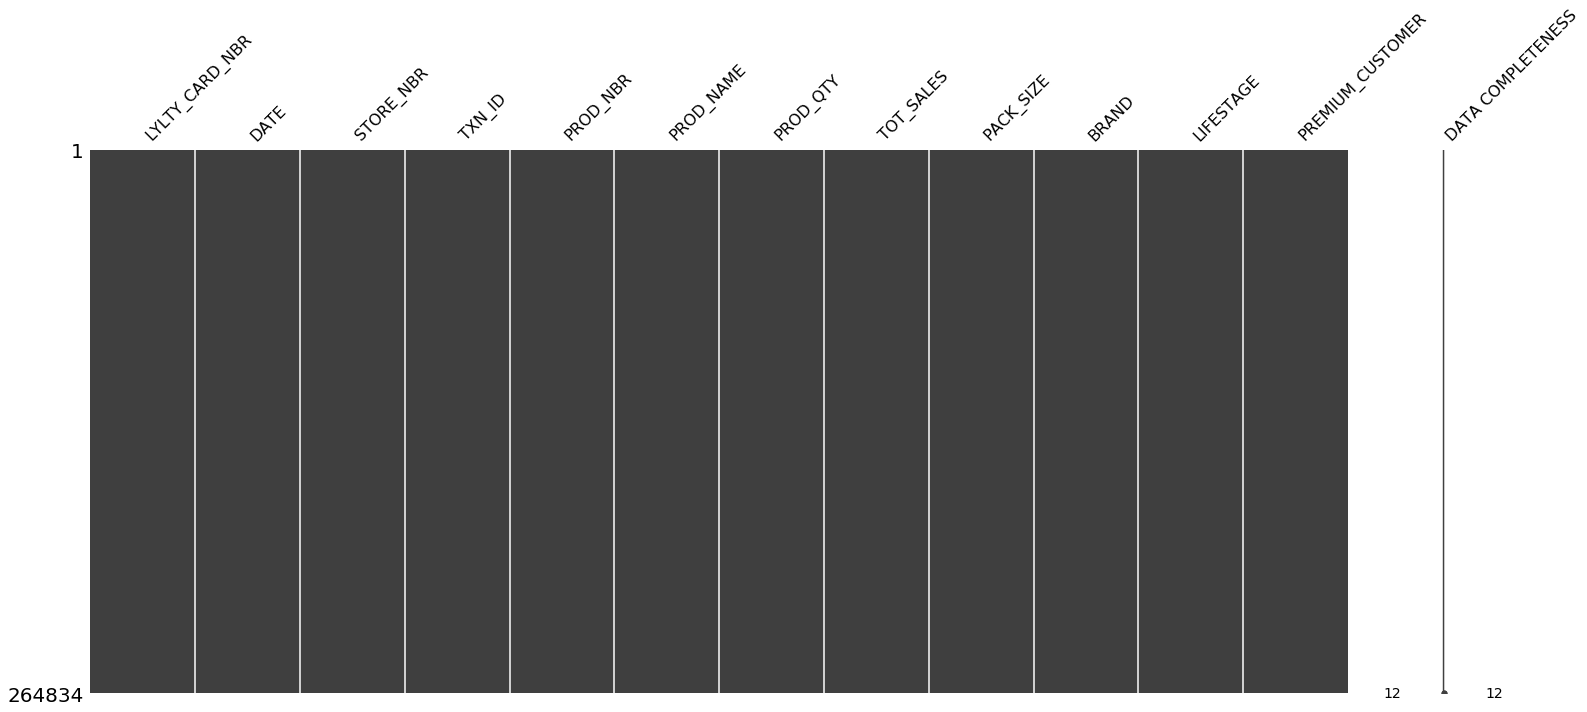

In [3]:
#Missing data
missingno.matrix(data, labels = True) #No missing data!

## Selecting control store
Julia has asked us to evaluate the performance of a store trial which was performed in stores 77, 86 and 88.

Consider the monthly sales experience of each store. This can be broken down by:

- total sales revenue
- total number of customers
- average number of transactions per customer

!!!We use Euclidean Distance as measure to how close the two stores are!!!

In [4]:
#Format date to get month
data.head()
data['YYYY/MM'] = data['DATE'].str.extract(r'(201[8,9]-\d\d)-\d\d')
data['YYYY/MM'] = data['YYYY/MM'].apply(lambda x: x.replace('-',''))
data['YYYY/MM']

0         201810
1         201809
2         201903
3         201903
4         201811
           ...  
264829    201812
264830    201810
264831    201810
264832    201810
264833    201812
Name: YYYY/MM, Length: 264834, dtype: object

In [5]:
#Monthly total sales
mts = data.groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
print(mts)

STORE_NBR  YYYY/MM
1          201807     206.9
           201808     176.1
           201809     278.8
           201810     188.1
           201811     192.6
                      ...  
272        201902     395.5
           201903     442.3
           201904     445.1
           201905     314.6
           201906     312.1
Name: TOT_SALES, Length: 3169, dtype: float64


In [6]:
#total number of customers
tnc = data.groupby(['STORE_NBR','YYYY/MM']).LYLTY_CARD_NBR.nunique()
print(tnc)

STORE_NBR  YYYY/MM
1          201807     49
           201808     42
           201809     59
           201810     44
           201811     46
                      ..
272        201902     45
           201903     50
           201904     54
           201905     34
           201906     34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64


In [7]:
#Average number of transactions per customer
avg_ntc = data.groupby(['STORE_NBR','YYYY/MM']).TXN_ID.nunique() / data.groupby(['STORE_NBR','YYYY/MM']).LYLTY_CARD_NBR.nunique()
print(avg_ntc)

STORE_NBR  YYYY/MM
1          201807     1.061224
           201808     1.023810
           201809     1.050847
           201810     1.022727
           201811     1.021739
                        ...   
272        201902     1.066667
           201903     1.060000
           201904     1.018519
           201905     1.176471
           201906     1.088235
Length: 3169, dtype: float64


### Store 77, 86 and 88

In [8]:
#
control = [mts,tnc,avg_ntc]
measure = pd.concat(control, axis=1, join = 'outer')
measure.rename(columns = {'TOT_SALES':'Monthly Total Sales','LYLTY_CARD_NBR':'Total Number of Customer',
                                                                     0:'Average number of transactions per customer'}, inplace = True)



In [9]:
measure

Monthly Total Sales  Total Number of Customer  \
STORE_NBR YYYY/MM                                                  
1         201807                 206.9                        49   
          201808                 176.1                        42   
          201809                 278.8                        59   
          201810                 188.1                        44   
          201811                 192.6                        46   
...                                ...                       ...   
272       201902                 395.5                        45   
          201903                 442.3                        50   
          201904                 445.1                        54   
          201905                 314.6                        34   
          201906                 312.1                        34   

                   Average number of transactions per customer  
STORE_NBR YYYY/MM                                               
1         201807                                      1.061224  
          201808                                      1.023810  
          201809                                      1.050847  
          201810                                      1.022727  
          201811                                      1.021739  
...                                                        ...  
272       201902                                      1.066667  
          201903                                      1.060000  
          201904                                      1.018519  
          201905                                      1.176471  
          201906                                      1.088235  

[3169 rows x 3 columns]

In [10]:
#Reset index so we can easily call out store 77,86 and 88.
measure.reset_index(inplace = True)
#measure.drop(columns = ['index'],inplace=True)
measure

,STORE_NBR,YYYY/MM,Monthly Total Sales,Total Number of Customer,Average number of transactions per customer
0,1,201807,206.9,49,1.061224
1,1,201808,176.1,42,1.023810
2,1,201809,278.8,59,1.050847
3,1,201810,188.1,44,1.022727
4,1,201811,192.6,46,1.021739
...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667
3165,272,201903,442.3,50,1.060000
3166,272,201904,445.1,54,1.018519
3167,272,201905,314.6,34,1.176471


In [11]:
#data before trial
measure['YYYY/MM'] = measure['YYYY/MM'].astype('int')
pre = measure.loc[measure['YYYY/MM'] < 201902,:]
pre
#we have 1848 rows of data that is pre-trial.

,STORE_NBR,YYYY/MM,Monthly Total Sales,Total Number of Customer,Average number of transactions per customer
0,1,201807,206.9,49,1.061224
1,1,201808,176.1,42,1.023810
2,1,201809,278.8,59,1.050847
3,1,201810,188.1,44,1.022727
4,1,201811,192.6,46,1.021739
...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000
3160,272,201810,430.6,44,1.136364
3161,272,201811,376.2,41,1.097561
3162,272,201812,403.9,47,1.000000


In [12]:
store_77 = pre[pre.STORE_NBR == 77]
store_77

,STORE_NBR,YYYY/MM,Monthly Total Sales,Total Number of Customer,Average number of transactions per customer
880,77,201807,296.8,51,1.078431
881,77,201808,255.5,47,1.021277
882,77,201809,225.2,42,1.047619
883,77,201810,204.5,37,1.027027
884,77,201811,245.3,41,1.073171
885,77,201812,267.3,46,1.043478
886,77,201901,204.4,35,1.114286


In [13]:
store_86 = pre[pre.STORE_NBR == 86]
store_86

,STORE_NBR,YYYY/MM,Monthly Total Sales,Total Number of Customer,Average number of transactions per customer
977,86,201807,892.20,99,1.272727
978,86,201808,764.05,94,1.170213
979,86,201809,914.60,103,1.242718
980,86,201810,948.40,109,1.266055
981,86,201811,918.00,100,1.250000
982,86,201812,841.20,98,1.224490
983,86,201901,841.40,94,1.372340


In [14]:
store_88 = pre[pre.STORE_NBR == 88]
store_88

,STORE_NBR,YYYY/MM,Monthly Total Sales,Total Number of Customer,Average number of transactions per customer
1001,88,201807,1310.0,129,1.186047
1002,88,201808,1323.8,131,1.206107
1003,88,201809,1423.0,124,1.266129
1004,88,201810,1352.4,123,1.260163
1005,88,201811,1382.8,130,1.200000
1006,88,201812,1325.2,126,1.174603
1007,88,201901,1266.4,117,1.230769


In [15]:
#Function to calculate correlation between trial store and each of the remaining stores
def corre(df,metrics,trial):
    import numpy as np
    trial_store = df.loc[df.STORE_NBR == trial,metrics]
    trial_store.reset_index(drop = True, inplace = True)
    result = pd.DataFrame({'Trial_Store':[],'Control_Store':[],'Correlation':[]})
    for i in pre.STORE_NBR.unique():
        control = df.loc[(df.STORE_NBR == i), metrics]
        control.reset_index(drop = True, inplace = True)
        result = result.append({'Trial_Store':int(trial),'Control_Store':int(i),'Correlation':control.corr(trial_store)}, ignore_index = True)
        result = result.sort_values(by = 'Correlation', ascending = False)
    return result


#Function to calculate Euclidean distance between trial store and each of the remaining stores
def norm(df,metrics,trial):
    import numpy as np
    trial_store = df.loc[df.STORE_NBR == trial,metrics]
    trial_store.reset_index(drop = True, inplace = True)
    result = pd.DataFrame({'Trial_Store':[],'Control_Store':[],'Norm Distance':[]})
    for i in pre.STORE_NBR.unique():
        control = df.loc[(df.STORE_NBR == i), metrics]
        control.reset_index(drop = True, inplace = True)
        norm = np.sqrt(sum((trial_store - control)**2))
        result = result.append({'Trial_Store':int(trial),'Control_Store':int(i),'Norm Distance':norm}, ignore_index = True)
    #Normalized
    result['Norm Distance'] = 1-(result['Norm Distance'] - result['Norm Distance'].min())/(result['Norm Distance'].max()- result['Norm Distance'].min())
    #Sort
    result = result.sort_values(by = 'Norm Distance', ascending = False)
    return result



## Selecting Control Store for #77

In [16]:
def cal_score(df,metrics,trial):
    corrs = corre(df,metrics,trial)
    norms = norm(df,metrics,trial)
    final = corrs.merge(norms[['Control_Store','Norm Distance']], on = ['Control_Store'], how ='inner' )
    final['score_{}'.format(metrics)] = final['Norm Distance']*0.5+final['Correlation']*0.5
    return final[['Control_Store','score_{}'.format(metrics)]]

def result(df,metrics,trial):
    metrics = ['Monthly Total Sales','Total Number of Customer']
    table = pd.DataFrame()
    for i in metrics:
        if i == metrics[0]:
            table = cal_score(pre,i,trial)
        else:
            temp = cal_score(pre,i,trial)
            table = table.merge(temp,on='Control_Store',how='inner')
    table['avg_score'] = table.loc[:,(table.columns != 'Control_Store')].mean(axis=1)
    table = table.sort_values(by='avg_score', ascending = False)
    return table


In [17]:
#We define out metrics:
metrics = ['Monthly Total Sales','Total Number of Customer']

In [18]:
#77
table_77 = result(pre,metrics,77)
table_77

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Control_Store,score_Monthly Total Sales,score_Total Number of Customer,avg_score
0,77.0,1.000000,1.000000,1.000000
2,233.0,0.942990,0.989841,0.966416
6,41.0,0.871493,0.906614,0.889053
4,17.0,0.856776,0.852019,0.854398
18,254.0,0.745939,0.922756,0.834347
...,...,...,...,...
266,85.0,NaN,NaN,NaN
267,193.0,NaN,NaN,NaN
268,206.0,NaN,NaN,NaN
269,211.0,NaN,NaN,NaN


In [19]:
#86
table_86 = result(pre,metrics,86)
table_86

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Control_Store,score_Monthly Total Sales,score_Total Number of Customer,avg_score
0,86.0,1.000000,1.000000,1.000000
1,155.0,0.913770,0.962631,0.938200
6,109.0,0.870966,0.863373,0.867169
9,114.0,0.819826,0.891466,0.855646
7,138.0,0.837855,0.836514,0.837185
...,...,...,...,...
266,85.0,NaN,NaN,NaN
267,193.0,NaN,NaN,NaN
268,206.0,NaN,NaN,NaN
269,211.0,NaN,NaN,NaN


In [20]:
#88
table_88 = result(pre,metrics,88)
table_88

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Control_Store,score_Monthly Total Sales,score_Total Number of Customer,avg_score
0,88.0,1.000000,1.000000,1.000000
57,237.0,0.626713,0.965327,0.796020
10,178.0,0.712450,0.878769,0.795610
39,69.0,0.575098,0.837552,0.706325
32,113.0,0.586604,0.821169,0.703886
...,...,...,...,...
266,85.0,NaN,NaN,NaN
267,193.0,NaN,NaN,NaN
268,206.0,NaN,NaN,NaN
269,211.0,NaN,NaN,NaN


## Conclusion:

Using a weight score for correlation and norm distance, we could set the control store for three of our trial store as the table shown below:

| Trial | Control | 
|--- | --- |
| 77 | 233  | 
| 86 | 155 |  
| 88 | 237 |  


## Assessment of the trial
This one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. Based on the insight we conclude whether the trial store is successful or not.

In [21]:
assess = data[['STORE_NBR','DATE','TOT_SALES']]
assess['DATE'] = assess['DATE'].apply(lambda x: x.split('-')[:2])
assess.rename(columns = {'DATE':'YYYY/MM'},inplace=True)
assess['YYYY/MM'] = assess['YYYY/MM'].apply(lambda x: x[0]+x[1]).astype('int')
assess

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,STORE_NBR,YYYY/MM,TOT_SALES
0,1,201810,6.0
1,1,201809,2.7
2,1,201903,3.6
3,1,201903,3.0
4,1,201811,1.9
...,...,...,...
264829,88,201812,7.2
264830,88,201810,9.2
264831,88,201810,8.4
264832,88,201810,10.2


### Visualize the performance to compare trial and control store
### Trial 77 Control 233

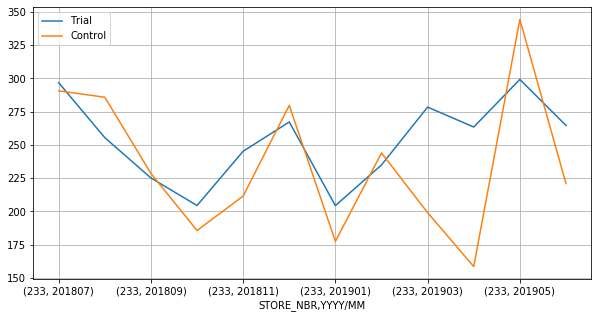

In [22]:
#Visualize the performance to compare trial and control store
#77
store_77 = assess[assess['STORE_NBR']== 77].groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
store_233 = assess[assess['STORE_NBR']== 233].groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
#store_other = assess[(assess['STORE_NBR']!= 77)].groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
plt.figure(figsize = (10,5))
store_77.plot()
store_233.plot()
#store_other.plot()
plt.legend(labels = ['Trial','Control','other'])
plt.grid(which='both')

### Findings;
The two stores follow a similar pattern, which again prove the control store selection was successful.
Next we conduct hypothesis testing to determine whether there is difference in trial and control.

In [23]:
store_77 = store_77.reset_index(level = 0, drop=True)

In [24]:
#Combine trial and control data and calculate %change in sales
check_77 = pd.DataFrame(np.array([store_77.index,store_77.values]).T, columns = ['DATE','Trial Sales'])
check_77['Control Sales'] = store_233.values
check_77['DATE'] = pd.to_datetime(check_77['DATE'].astype(int).astype(str),format='%Y%m')
check_77['%Change'] = abs((check_77['Control Sales'] - check_77['Trial Sales'])/check_77['Control Sales'])
check_77

,DATE,Trial Sales,Control Sales,%Change
0,2018-07-01,296.8,290.7,0.020984
1,2018-08-01,255.5,285.9,0.106331
2,2018-09-01,225.2,228.6,0.014873
3,2018-10-01,204.5,185.7,0.101239
4,2018-11-01,245.3,211.6,0.159263
5,2018-12-01,267.3,279.8,0.044675
6,2019-01-01,204.4,177.5,0.151549
7,2019-02-01,235.0,244.0,0.036885
8,2019-03-01,278.5,199.1,0.398795
9,2019-04-01,263.5,158.6,0.661412


In [25]:
#Null hypothesis: the trial sales is the same as pre-trial sales. (i.e. d = 0)
#Alternative hypothesis: the trial sales is not the same as pre-trial sales. (i.e. d! = 0)
import datetime
trial_start = datetime.datetime(year=2019,month=2,day=1)
se = check_77.loc[check_77['DATE'] < trial_start,'%Change'].std()
se

0.059585018402688

In [26]:
#Degree of freedom = n_pre_trial -1
dof = 8 -1
print('Degree of freedom is :{}\nStandard Error is : {}'.format(dof,se))

Degree of freedom is :7
Standard Error is : 0.059585018402688


In [27]:
#Test if there is difference in trial and control
check_77['t-score'] = (check_77['%Change'] - 0)/se

#Select the trial period
trial_end = datetime.datetime(year=2019,month=4,day=1)
crt_t = t.ppf(0.95, dof)
print('Critical t is: {}'.format(crt_t))
check_77[(check_77['DATE'] >= trial_start) & (check_77['DATE'] <= trial_end)]

#Base on the t-score, we can see March and April can reject null hypothesis

Critical t is: 1.894578605061305


,DATE,Trial Sales,Control Sales,%Change,t-score
7,2019-02-01,235.0,244.0,0.036885,0.619036
8,2019-03-01,278.5,199.1,0.398795,6.692867
9,2019-04-01,263.5,158.6,0.661412,11.100313


In [28]:
check_77['95%CI'] = check_77['Control Sales']*(1+crt_t*se)
check_77['5%CI'] = check_77['Control Sales']*(1-crt_t*se)
check_77

,DATE,Trial Sales,Control Sales,%Change,t-score,95%CI,5%CI
0,2018-07-01,296.8,290.7,0.020984,0.352166,323.516687,257.883313
1,2018-08-01,255.5,285.9,0.106331,1.784524,318.174822,253.625178
2,2018-09-01,225.2,228.6,0.014873,0.249612,254.406311,202.793689
3,2018-10-01,204.5,185.7,0.101239,1.699061,206.663395,164.736605
4,2018-11-01,245.3,211.6,0.159263,2.672866,235.487207,187.712793
5,2018-12-01,267.3,279.8,0.044675,0.749765,311.386203,248.213797
6,2019-01-01,204.4,177.5,0.151549,2.543413,197.537709,157.462291
7,2019-02-01,235.0,244.0,0.036885,0.619036,271.544794,216.455206
8,2019-03-01,278.5,199.1,0.398795,6.692867,221.576101,176.623899
9,2019-04-01,263.5,158.6,0.661412,11.100313,176.504116,140.695884


In [29]:
plot_77 = pd.DataFrame(check_77)
plot_77 = plot_77.drop(columns = ['%Change','t-score'])
plot_77 = plot_77.set_index('DATE')

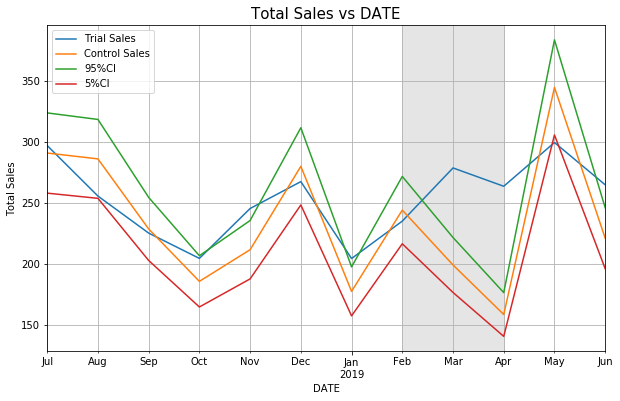

In [30]:
#The shaded area is the trial period
plot_77.plot(legend = True, figsize=(10,6))
plt.axvspan(trial_start,trial_end,color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.ylabel('Total Sales')
plt.title('Total Sales vs DATE',size=15)
plt.grid(which='both')

Text(0.5, 1.0, 'Total Sales vs DATE')

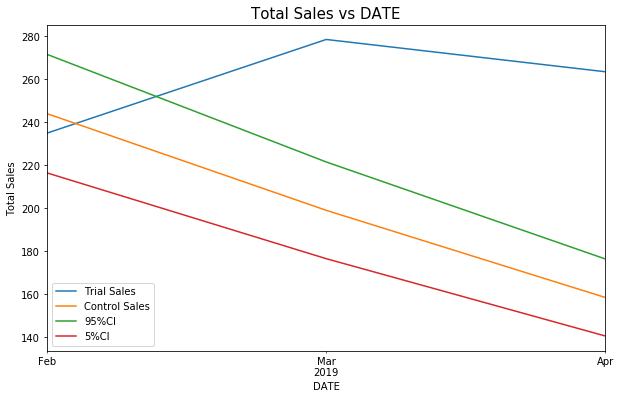

In [31]:
#Zoom-in for just the trial period
plot_77.iloc[(plot_77.index >= trial_start) & (plot_77.index <= trial_end),:].plot(legend = True, figsize=(10,6))
plt.ylabel('Total Sales')
plt.title('Total Sales vs DATE',size=15)

### Findings:
March and April shows a difference greater than 0.

### Trial 86 Control 155
We repeat the same process!

[164978.5  157825.55 160296.8  164211.2  159988.4  167646.1  162437.9
 150430.   165986.7  159581.6  156418.35 160273.9 ]


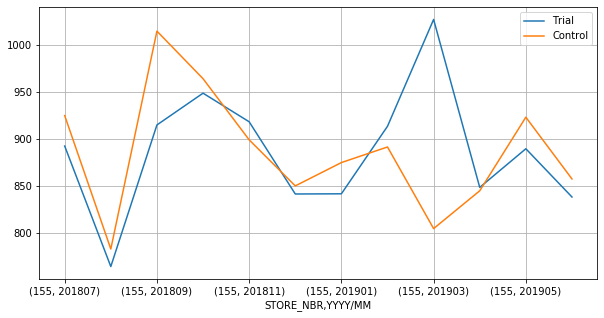

In [32]:
store_86 = assess[assess['STORE_NBR']== 86].groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
store_155 = assess[assess['STORE_NBR']== 155].groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
store_other = assess[(assess['STORE_NBR']!= 77) | (assess['STORE_NBR']== 155)].groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
plt.figure(figsize = (10,5))
store_86.plot()
store_155.plot()
plt.legend(labels = ['Trial','Control'])
print(store_other.groupby('YYYY/MM').sum().values)
plt.grid(which='both')

### Findings;
The two stores follow a similar pattern, which means the control store selection was successful.


In [33]:
store_86 = store_86.reset_index(level = 0, drop=True)

In [34]:
#Combine trial and control data and calculate %change in sales
check_86 = pd.DataFrame(np.array([store_86.index,store_86.values]).T, columns = ['DATE','Trial Sales'])
check_86['Control Sales'] = store_155.values
check_86['DATE'] = pd.to_datetime(check_86['DATE'].astype(int).astype(str),format='%Y%m')
check_86['%Change'] = abs((check_86['Control Sales'] - check_86['Trial Sales'])/check_86['Control Sales'])
check_86

,DATE,Trial Sales,Control Sales,%Change
0,2018-07-01,892.20,924.60,0.035042
1,2018-08-01,764.05,782.70,0.023828
2,2018-09-01,914.60,1014.40,0.098383
3,2018-10-01,948.40,963.80,0.015978
4,2018-11-01,918.00,898.80,0.021362
5,2018-12-01,841.20,849.80,0.010120
6,2019-01-01,841.40,874.60,0.037960
7,2019-02-01,913.20,891.20,0.024686
8,2019-03-01,1026.80,804.40,0.276479
9,2019-04-01,848.20,844.60,0.004262


In [35]:
#Null hypothesis: the trial sales is the same as pre-trial sales. (i.e. d = 0)
#Alternative hypothesis: the trial sales is not the same as pre-trial sales. (i.e. d! = 0)
import datetime
trial_start = datetime.datetime(year=2019,month=2,day=1)
se = check_86.loc[check_86['DATE'] < trial_start,'%Change'].std()
se

0.029768786866298982

In [36]:
#Degree of freedom = n_pre_trial -1
dof = 8 -1
print('Degree of freedom is :{}\nStandard Error is : {}'.format(dof,se))

Degree of freedom is :7
Standard Error is : 0.029768786866298982


In [37]:
#Test if there is difference in trial and control
check_86['t-score'] = (check_86['%Change'] - 0)/se

#Select the trial period
trial_end = datetime.datetime(year=2019,month=4,day=1)
crt_t = t.ppf(0.95, dof)
print('Critical t is: {}'.format(crt_t))
check_86[(check_86['DATE'] >= trial_start) & (check_86['DATE'] <= trial_end)]

#Base on the t-score, we can see March and April can reject null hypothesis

Critical t is: 1.894578605061305


,DATE,Trial Sales,Control Sales,%Change,t-score
7,2019-02-01,913.2,891.2,0.024686,0.829252
8,2019-03-01,1026.8,804.4,0.276479,9.287559
9,2019-04-01,848.2,844.6,0.004262,0.143183


In [38]:
check_86['95%CI'] = check_86['Control Sales']*(1+crt_t*se)
check_86['5%CI'] = check_86['Control Sales']*(1-crt_t*se)
check_86

,DATE,Trial Sales,Control Sales,%Change,t-score,95%CI,5%CI
0,2018-07-01,892.20,924.60,0.035042,1.177145,976.746799,872.453201
1,2018-08-01,764.05,782.70,0.023828,0.800428,826.843737,738.556263
2,2018-09-01,914.60,1014.40,0.098383,3.304914,1071.611457,957.188543
3,2018-10-01,948.40,963.80,0.015978,0.536751,1018.157652,909.442348
4,2018-11-01,918.00,898.80,0.021362,0.717591,949.491697,848.108303
5,2018-12-01,841.20,849.80,0.010120,0.339954,897.728131,801.871869
6,2019-01-01,841.40,874.60,0.037960,1.275168,923.926834,825.273166
7,2019-02-01,913.20,891.20,0.024686,0.829252,941.463062,840.936938
8,2019-03-01,1026.80,804.40,0.276479,9.287559,849.767602,759.032398
9,2019-04-01,848.20,844.60,0.004262,0.143183,892.234854,796.965146


In [39]:
plot_86 = pd.DataFrame(check_86)
plot_86 = plot_86.drop(columns = ['%Change','t-score'])
plot_86 = plot_86.set_index('DATE')

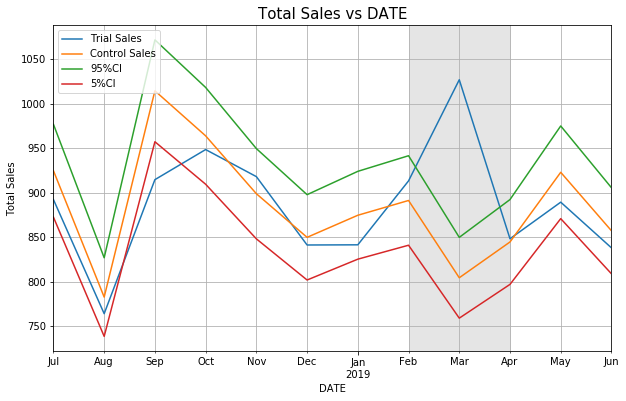

In [40]:
#The shaded area is the trial period
plot_86.plot(legend = True, figsize=(10,6))
plt.axvspan(trial_start,trial_end,color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.ylabel('Total Sales')
plt.title('Total Sales vs DATE',size=15)
plt.grid(which='both')

Text(0.5, 1.0, 'Total Sales vs DATE')

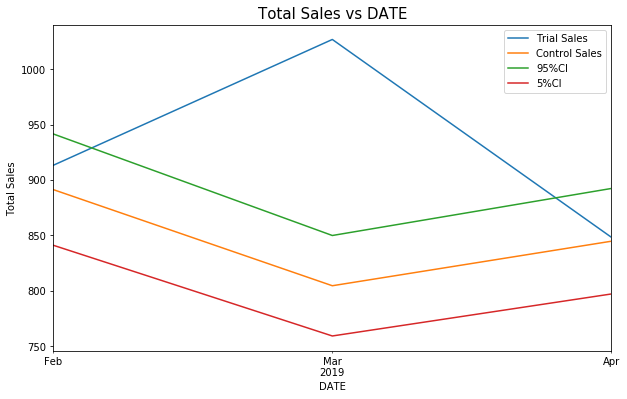

In [43]:
#Zoom-in for just the trial period
plot_86.iloc[(plot_86.index >= trial_start) & (plot_86.index <= trial_end),:].plot(legend = True, figsize=(10,6))
plt.ylabel('Total Sales')
plt.title('Total Sales vs DATE',size=15)

### Findings:
Only March exhibit a statistically different greater than 0.

### Store 88 Control 237

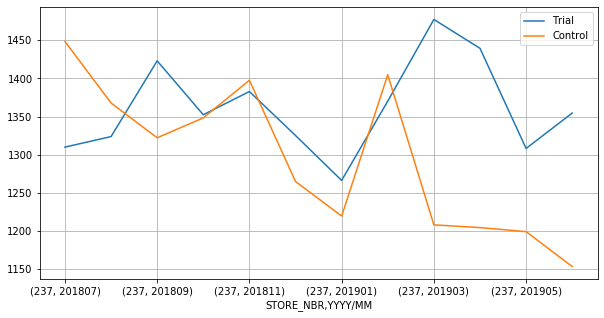

In [44]:
store_88 = assess[assess['STORE_NBR']== 88].groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
store_237 = assess[assess['STORE_NBR']== 237].groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
#store_other = assess[(assess['STORE_NBR']!= 77)].groupby(['STORE_NBR','YYYY/MM']).TOT_SALES.sum()
plt.figure(figsize = (10,5))
store_88.plot()
store_237.plot()
#store_other.plot()
plt.legend(labels = ['Trial','Control','other'])
plt.grid(which='both')

In [45]:
store_88 = store_88.reset_index(level = 0, drop=True)

In [46]:
#Combine trial and control data and calculate %change in sales
check_88 = pd.DataFrame(np.array([store_88.index,store_88.values]).T, columns = ['DATE','Trial Sales'])
check_88['Control Sales'] = store_237.values
check_88['DATE'] = pd.to_datetime(check_88['DATE'].astype(int).astype(str),format='%Y%m')
check_88['%Change'] = abs((check_88['Control Sales'] - check_88['Trial Sales'])/check_88['Control Sales'])
check_88

,DATE,Trial Sales,Control Sales,%Change
0,2018-07-01,1310.00,1448.4,0.095554
1,2018-08-01,1323.80,1367.8,0.032168
2,2018-09-01,1423.00,1322.2,0.076237
3,2018-10-01,1352.40,1348.3,0.003041
4,2018-11-01,1382.80,1397.6,0.010590
5,2018-12-01,1325.20,1265.0,0.047589
6,2019-01-01,1266.40,1219.7,0.038288
7,2019-02-01,1370.20,1404.8,0.024630
8,2019-03-01,1477.20,1208.2,0.222645
9,2019-04-01,1439.40,1204.6,0.194919


In [47]:
#Null hypothesis: the trial sales is the same as pre-trial sales. (i.e. d = 0)
#Alternative hypothesis: the trial sales is not the same as pre-trial sales. (i.e. d! = 0)
import datetime
trial_start = datetime.datetime(year=2019,month=2,day=1)
se = check_88.loc[check_88['DATE'] < trial_start,'%Change'].std()
se

0.033350273234884875

In [48]:
#Degree of freedom = n_pre_trial -1
dof = 8 -1
print('Degree of freedom is :{}\nStandard Error is : {}'.format(dof,se))

Degree of freedom is :7
Standard Error is : 0.033350273234884875


In [49]:
#Test if there is difference in trial and control
check_88['t-score'] = (check_88['%Change'] - 0)/se

#Select the trial period
trial_end = datetime.datetime(year=2019,month=4,day=1)
crt_t = t.ppf(0.95, dof)
print('Critical t is: {}'.format(crt_t))
check_88[(check_88['DATE'] >= trial_start) & (check_88['DATE'] <= trial_end)]

#Base on the t-score, we can see March and April can reject null hypothesis

Critical t is: 1.894578605061305


,DATE,Trial Sales,Control Sales,%Change,t-score
7,2019-02-01,1370.2,1404.8,0.024630,0.738520
8,2019-03-01,1477.2,1208.2,0.222645,6.675965
9,2019-04-01,1439.4,1204.6,0.194919,5.844614


In [50]:
check_88['95%CI'] = check_88['Control Sales']*(1+crt_t*se)
check_88['5%CI'] = check_88['Control Sales']*(1-crt_t*se)
check_88

,DATE,Trial Sales,Control Sales,%Change,t-score,95%CI,5%CI
0,2018-07-01,1310.00,1448.4,0.095554,2.865155,1539.916740,1356.883260
1,2018-08-01,1323.80,1367.8,0.032168,0.964563,1454.224052,1281.375948
2,2018-09-01,1423.00,1322.2,0.076237,2.285936,1405.742829,1238.657171
3,2018-10-01,1352.40,1348.3,0.003041,0.091180,1433.491950,1263.108050
4,2018-11-01,1382.80,1397.6,0.010590,0.317526,1485.906956,1309.293044
5,2018-12-01,1325.20,1265.0,0.047589,1.426943,1344.928663,1185.071337
6,2019-01-01,1266.40,1219.7,0.038288,1.148060,1296.766396,1142.633604
7,2019-02-01,1370.20,1404.8,0.024630,0.738520,1493.561886,1316.038114
8,2019-03-01,1477.20,1208.2,0.222645,6.675965,1284.539772,1131.860228
9,2019-04-01,1439.40,1204.6,0.194919,5.844614,1280.712307,1128.487693


In [51]:
plot_88 = pd.DataFrame(check_88)
plot_88 = plot_88.drop(columns = ['%Change','t-score'])
plot_88 = plot_88.set_index('DATE')

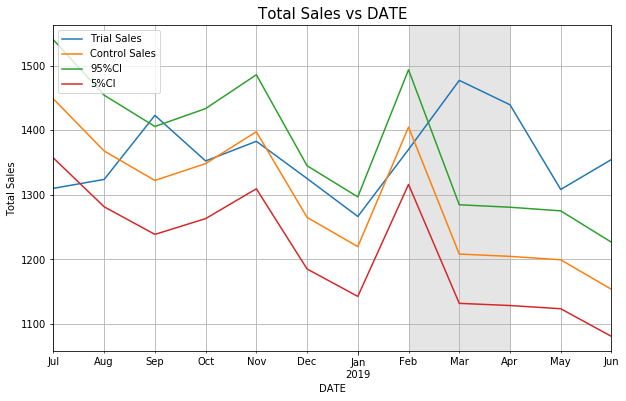

In [52]:
#The shaded area is the trial period
plot_88.plot(legend = True, figsize=(10,6))
plt.axvspan(trial_start,trial_end,color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.ylabel('Total Sales')
plt.title('Total Sales vs DATE',size=15)
plt.grid(which='both')

Text(0.5, 1.0, 'Total Sales vs DATE')

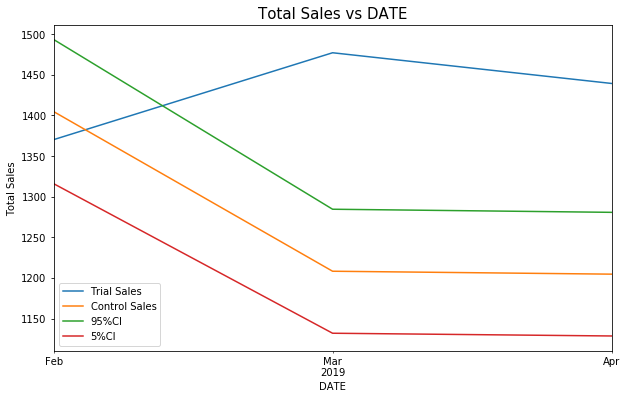

In [53]:
#Zoom-in for just the trial period
plot_88.iloc[(plot_88.index >= trial_start) & (plot_88.index <= trial_end),:].plot(legend = True, figsize=(10,6))
plt.ylabel('Total Sales')
plt.title('Total Sales vs DATE',size=15)

### Findings:
March and April shows a difference greater than 0.

## Conlusion on performance:
To sum up, the we discover Trial Store total sales higher than control store in the following trial months: \
Trial 77: <b>March</b> and <b>April</b> in 2019.\
Trial 86: <b>March</b> in 2019.\
Trial 88: <b>March</b> and <b>April</b> in 2019.\

Hence, we could say that the trial is considerably successful.

According to the analysis from Task 1,the answer to: "Whether the driver of change is <u>more purchasing customers</u> or <u>more purchases per customers</u>." is <b>more purchasing customer</b>.